/Users/enrique/Projects/Coding/ML-2-8/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(



=== Running layers=1: {'n_layers': 1, 'units': [128], 'bidirectional': False}
Epoch 1/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 1.0861 - val_loss: 1.0797
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 1.0883 - val_loss: 1.0782
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 1.0861 - val_loss: 1.0779
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 1.0749 - val_loss: 1.0781
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 1.0743 - val_loss: 1.0798
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
layers=1 macro-F1: 0.1827

=== Running layers=2: {'n_layers': 2, 'units': [128, 128], 'bidirectional': False}
Epoch 1/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 1.0934 - val_loss: 1.0876
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 1.0863 - val_loss: 1.0870
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 1.0838 - val_loss: 1.0779
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 1.0721 - val_loss: 1.0790
Epoch 5/5
16/16

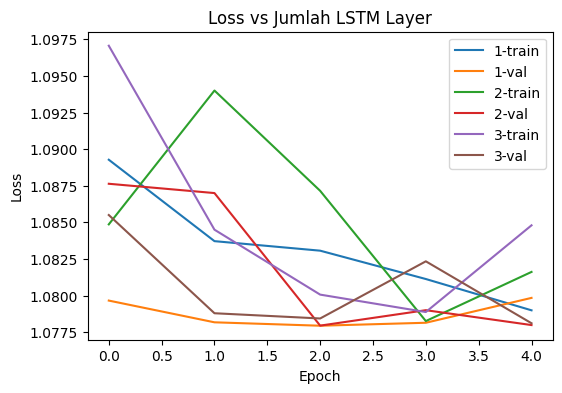

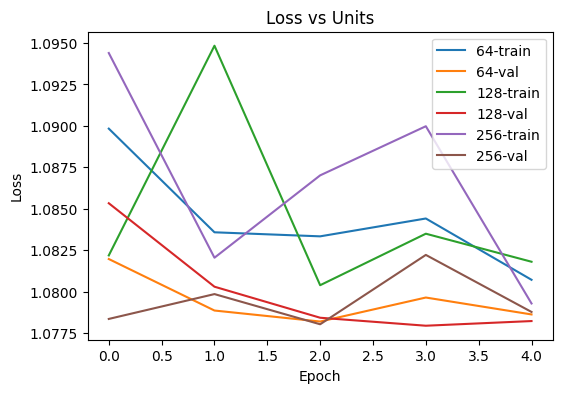

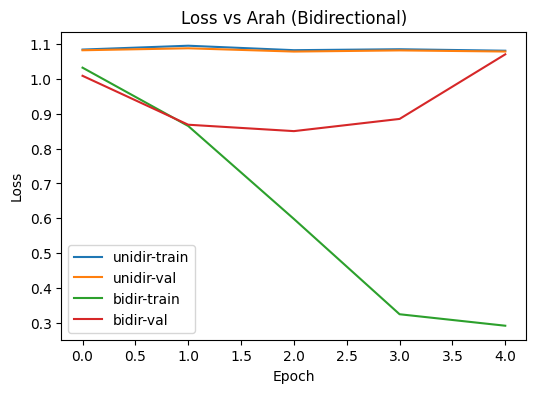

/Users/enrique/Projects/Coding/ML-2-8/src/models/lstm/lstm_layer.py:15: RuntimeWarning: divide by zero encountered in matmul
  z = xt @ self.W + H @ self.U + self.b
/Users/enrique/Projects/Coding/ML-2-8/src/models/lstm/lstm_layer.py:15: RuntimeWarning: overflow encountered in matmul
  z = xt @ self.W + H @ self.U + self.b
/Users/enrique/Projects/Coding/ML-2-8/src/models/lstm/lstm_layer.py:15: RuntimeWarning: invalid value encountered in matmul
  z = xt @ self.W + H @ self.U + self.b


 5/13 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step

/Users/enrique/Projects/Coding/ML-2-8/src/models/lstm/dense_layer.py:9: RuntimeWarning: divide by zero encountered in matmul
  z = x @ self.W + self.b
/Users/enrique/Projects/Coding/ML-2-8/src/models/lstm/dense_layer.py:9: RuntimeWarning: overflow encountered in matmul
  z = x @ self.W + self.b
/Users/enrique/Projects/Coding/ML-2-8/src/models/lstm/dense_layer.py:9: RuntimeWarning: invalid value encountered in matmul
  z = x @ self.W + self.b


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
max|keras - scratch| = 2.3245811e-06
macro-F1 (scratch): 0.6656


/Users/enrique/Projects/Coding/ML-2-8/src/models/lstm/lstm_layer.py:15: RuntimeWarning: divide by zero encountered in matmul
  z = xt @ self.W + H @ self.U + self.b
/Users/enrique/Projects/Coding/ML-2-8/src/models/lstm/lstm_layer.py:15: RuntimeWarning: overflow encountered in matmul
  z = xt @ self.W + H @ self.U + self.b
/Users/enrique/Projects/Coding/ML-2-8/src/models/lstm/lstm_layer.py:15: RuntimeWarning: invalid value encountered in matmul
  z = xt @ self.W + H @ self.U + self.b


max|scratch - loaded| = 0.0
macro-F1 (scratch loaded): 0.6656


/Users/enrique/Projects/Coding/ML-2-8/src/models/lstm/dense_layer.py:9: RuntimeWarning: divide by zero encountered in matmul
  z = x @ self.W + self.b
/Users/enrique/Projects/Coding/ML-2-8/src/models/lstm/dense_layer.py:9: RuntimeWarning: overflow encountered in matmul
  z = x @ self.W + self.b
/Users/enrique/Projects/Coding/ML-2-8/src/models/lstm/dense_layer.py:9: RuntimeWarning: invalid value encountered in matmul
  z = x @ self.W + self.b


In [ ]:
import os
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score

from models.lstm.keras_model import build_lstm_model
from models.lstm.scratch_model import ScratchLSTMClassifier
from tensorflow.keras.layers import TextVectorization

# Set seed
os.environ['PYTHONHASHSEED'] = '42'
os.environ['TF_DETERMINISTIC_OPS'] = '1'
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

train = pd.read_csv('./../data/nusaX-sentiment/train.csv')
valid = pd.read_csv('./../data/nusaX-sentiment/valid.csv')
test  = pd.read_csv('./../data/nusaX-sentiment/test.csv')

le = LabelEncoder()
y_train = le.fit_transform(train['label'])
y_val   = le.transform(valid['label'])
y_test  = le.transform(test['label'])
num_classes = len(le.classes_)

texts_train = train['text'].astype(str).tolist()
texts_val   = valid['text'].astype(str).tolist()
texts_test  = test['text'].astype(str).tolist()

max_tokens = 20000
max_len    = 100
embed_dim  = 128

vectorizer = TextVectorization(max_tokens=max_tokens, output_sequence_length=max_len)
vectorizer.adapt(texts_train)

def make_dataset(texts, labels, batch=32, shuffle=True):
    x = vectorizer(tf.constant(texts))
    ds = tf.data.Dataset.from_tensor_slices((x, labels))
    if shuffle: ds = ds.shuffle(1024)
    return ds.batch(batch).prefetch(1)

ds_train = make_dataset(texts_train, y_train)
ds_val   = make_dataset(texts_val,   y_val,   shuffle=False)
ds_test  = make_dataset(texts_test,  y_test,  shuffle=False)

# === 3. TRAINING & EVALUASI ===
def train_and_eval(params, name):
    print(f"\n=== Running {name}: {params}")
    model = build_lstm_model(**params, max_len=max_len, max_tokens=max_tokens, embed_dim=embed_dim, num_classes=num_classes)
    hist = model.fit(ds_train, validation_data=ds_val, epochs=5)
    y_pred = np.argmax(model.predict(ds_test), axis=-1)
    f1 = f1_score(y_test, y_pred, average='macro')
    print(f"{name} macro-F1: {f1:.4f}")
    return model, hist, f1

# EXPERIMENT 1: Jumlah Layer
exp1 = []
for n in [1, 2, 3]:
    config = {'n_layers': n, 'units': [128] * n, 'bidirectional': False}
    m, h, f = train_and_eval(config, f'layers={n}')
    exp1.append((n, h))

# EXPERIMENT 2: Banyak Unit
exp2 = []
for u in [64, 128, 256]:
    config = {'n_layers': 2, 'units': [u, u], 'bidirectional': False}
    m, h, f = train_and_eval(config, f'units={u}')
    exp2.append((u, h))

# EXPERIMENT 3: Bidirectional
exp3 = []
for b in [False, True]:
    config = {'n_layers': 2, 'units': [128, 128], 'bidirectional': b}
    name = "bidir" if b else "unidir"
    m, h, f = train_and_eval(config, name)
    exp3.append((name, h))

def plot_histories(exps, title):
    plt.figure(figsize=(6, 4))
    for label, hist in exps:
        plt.plot(hist.history['loss'], label=f"{label}-train")
        plt.plot(hist.history['val_loss'], label=f"{label}-val")
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_histories(exp1, "Loss vs Jumlah LSTM Layer")
plot_histories(exp2, "Loss vs Units")
plot_histories(exp3, "Loss vs Arah (Bidirectional)")

best_model = m
best_model.save_weights('best_lstm.weights.h5')
emb_w = best_model.layers[1].get_weights()[0]
d_w, d_b = best_model.layers[-1].get_weights()
lstm_layers = [ly for ly in best_model.layers if isinstance(ly, (tf.keras.layers.LSTM, tf.keras.layers.Bidirectional))]

def unpack_lstm(layer):
    if isinstance(layer, tf.keras.layers.Bidirectional):
        return_seq = layer.forward_layer.return_sequences
        Wf, Uf, bf = layer.forward_layer.get_weights()
        Wb, Ub, bb = layer.backward_layer.get_weights()
        return ('bidir', return_seq, (Wf, Uf, bf), (Wb, Ub, bb))
    else:
        return_seq = layer.return_sequences
        W, U, b = layer.get_weights()
        return ('unidir', return_seq, (W, U, b))

scratch_specs = [unpack_lstm(ly) for ly in lstm_layers]
scratch_model = ScratchLSTMClassifier(emb_w, scratch_specs, d_w, d_b)

texts_all = test['text'].astype(str).tolist()
x_int = vectorizer(tf.constant(texts_all)).numpy()
pred_scratch = scratch_model.forward(x_int)

print("max|keras - scratch| =", np.max(np.abs(best_model.predict(ds_test) - pred_scratch)))
yhat_s = np.argmax(pred_scratch, axis=1)
f1 = f1_score(y_test, yhat_s, average='macro')
print(f"macro-F1 (scratch): {f1:.4f}")

# try save load
scratch_model.save_npy("model_lstm_scratch.npy")

scratch_model_loaded = ScratchLSTMClassifier()
scratch_model_loaded.load_npy("model_lstm_scratch.npy")

pred_scratch_loaded = scratch_model_loaded.forward(x_int)
print("max|scratch - loaded| =", np.max(np.abs(pred_scratch - pred_scratch_loaded)))

yhat_s_loaded = np.argmax(pred_scratch_loaded, axis=1)
f1_loaded = f1_score(y_test, yhat_s_loaded, average='macro')
print(f"macro-F1 (scratch loaded): {f1_loaded:.4f}")